In [3]:
# Getting Sentiment Score with VADER
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import BertTokenizer, BertForSequenceClassification
import time
import torch
from tqdm import tqdm
from torch.nn.functional import softmax
import numpy as np

In [14]:
# Load your cleaned data (ensure the CSV file path is correct)
df = pd.read_csv('/notebooks/clean_tweets.csv')
df.head()

datetime  \
0  2022-06-23 23:59:58+00:00   
1  2022-06-23 23:59:57+00:00   
2  2022-06-23 23:59:57+00:00   
3  2022-06-24 23:59:59+00:00   
4  2022-06-24 23:59:55+00:00   

                                                text  \
0                                bitcoin price index   
1  wow looks so nice have a good feeling about th...   
2                       i mean bitcoin might beat it   
3                                bitcoin price index   
4  nope we in a bull run again bitcoin up 20 percent   

                                              tokens  \
0                      ['bitcoin', 'price', 'index']   
1  ['wow', 'looks', 'nice', 'good', 'feeling', 'd...   
2               ['mean', 'bitcoin', 'might', 'beat']   
3                      ['bitcoin', 'price', 'index']   
4  ['nope', 'bull', 'run', 'bitcoin', '20', 'perc...   

                                            pos_tags  \
0  [('bitcoin', 'NN'), ('price', 'NN'), ('index',...   
1  [('wow', 'NN'), ('looks', 'VBZ'), ('nice', 'JJ...   
2  [('mean', 'JJ'), ('bitcoin', 'NN'), ('might', ...   
3  [('bitcoin', 'NN'), ('price', 'NN'), ('index',...   
4  [('nope', 'RB'), ('bull', 'NN'), ('run', 'VB')...   

                                   lemmatized_tokens  \
0                      ['bitcoin', 'price', 'index']   
1  ['wow', 'look', 'nice', 'good', 'feeling', 'dr...   
2               ['mean', 'bitcoin', 'might', 'beat']   
3                      ['bitcoin', 'price', 'index']   
4  ['nope', 'bull', 'run', 'bitcoin', '20', 'perc...   

                                      stemmed_tokens  \
0                      ['bitcoin', 'price', 'index']   
1  ['wow', 'look', 'nice', 'good', 'feel', 'drop'...   
2               ['mean', 'bitcoin', 'might', 'beat']   
3                      ['bitcoin', 'price', 'index']   
4  ['nope', 'bull', 'run', 'bitcoin', '20', 'perc...   

                                cleaned_text  
0                        bitcoin price index  
1  wow look nice good feeling drop dm collab  
2                    mean bitcoin might beat  
3                        bitcoin price index  
4           nope bull run bitcoin 20 percent

In [15]:
print(df['cleaned_text'].isnull().sum())
# SOME MISSING NAN FOUND LETS CLEARN DATA FUERTHER

508


In [16]:
df['cleaned_text'] = df['cleaned_text'].fillna('')

In [17]:
# We need only date and clean_text column
df = df[["datetime", "cleaned_text"]]

In [18]:
df = df.rename(columns={"cleaned_text": "text"})  # Rename 'cleaned_text' to 'text'


In [19]:
# Ensure VADER is available
nltk.download("vader_lexicon")

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to assign sentiment labels using VADER
def get_vader_sentiment(text):
    if not isinstance(text, str) or text.strip() == "":
        return "Neutral", 0.0  # Default neutral for empty text
    
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores["compound"]  # Compound score is the main sentiment indicator

    # Convert score into sentiment label
    if compound_score >= 0.05:
        sentiment = "Positive"
    elif compound_score <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    
    return sentiment, compound_score

# Apply VADER sentiment analysis on the cleaned_text column
df["Sentiment"], df["Sentiment_Score"] = zip(*df["text"].apply(get_vader_sentiment))

# Save the results
output_path = "/notebooks/Sentiment_VADER.csv"
df.to_csv(output_path, index=False)

print(f"✅ VADER sentiment analysis complete! Results saved to: {output_path}")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


✅ VADER sentiment analysis complete! Results saved to: /notebooks/Sentiment_VADER.csv


In [4]:
# Load the processed dataset
df_VADER = pd.read_csv('/notebooks/Sentiment_VADER.csv')

# Display first 10 rows
print(df_VADER.head(10))


                    datetime  \
0  2022-06-23 23:59:58+00:00   
1  2022-06-23 23:59:57+00:00   
2  2022-06-23 23:59:57+00:00   
3  2022-06-24 23:59:59+00:00   
4  2022-06-24 23:59:55+00:00   
5  2022-06-24 23:59:51+00:00   
6  2022-06-24 23:59:44+00:00   
7  2022-06-24 23:59:41+00:00   
8  2022-06-24 23:59:38+00:00   
9  2022-06-24 23:59:34+00:00   

                                                text Sentiment  \
0                                bitcoin price index   Neutral   
1          wow look nice good feeling drop dm collab  Positive   
2                            mean bitcoin might beat   Neutral   
3                                bitcoin price index   Neutral   
4                   nope bull run bitcoin 20 percent   Neutral   
5                                          long live   Neutral   
6  rev 3 gekkoscience newpac usb bitcoin miner 28...   Neutral   
7  fun fact massive double top reversal pattern r...  Positive   
8           get bitcoin ether cried whole night long 

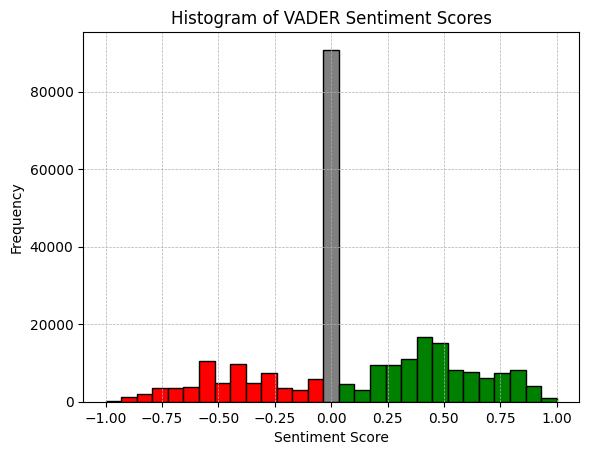

In [5]:
# Define your sentiment data and bins
data = df_VADER['Sentiment_Score']
bins = np.linspace(-1, 1, 30)  # Adjust the number of bins as needed

# Plot the histogram and capture the patches (bars)
counts, edges, patches = plt.hist(data, bins=bins, edgecolor='black')

# Colorize each bin based on its range:
for patch, left, right in zip(patches, edges[:-1], edges[1:]):
    if left < 0 and right > 0:
        patch.set_facecolor('grey')   # Neutral
    elif right <= 0:
        patch.set_facecolor('red')      # Negative
    else:
        patch.set_facecolor('green')    # Positive

# Add grid lines
plt.grid(True, linestyle='--', linewidth=0.5)

# Add labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of VADER Sentiment Scores')
plt.show()
